# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.34-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (679 bytes)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pyinstrument_cext-0.2.4-cp310-cp310-linux_x86_64.whl
Using cached smdebug-1.0.34-py2.py3-none-any.whl (280 kB)
Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3


In [3]:
!pip install torch torchvision

  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached torchvision-0.19.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached 

In [5]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import torch
import torchvision
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
import smdebug.pytorch as smd
from sagemaker.debugger import Rule, DebuggerHookConfig, TensorBoardOutputConfig, CollectionConfig, ProfilerRule, rule_configs, ProfilerConfig, FrameworkProfile
from sagemaker.analytics import HyperparameterTuningJobAnalytics

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2024-09-02 06:48:42--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.0, 52.219.121.72, 52.219.117.152, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  9.45MB/s    in 54s     

2024-09-02 06:49:37 (19.9 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [9]:
# TODO: Declare your HP ranges, metrics etc.

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

# Declare default hyperparameters
hyperparameters = {
    "batch_size": 32,
    "epochs": 10,
    "model": "resnet18",
}

# Define ranges for hyperparameters to be tuned
hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([64, 128]), # Uncomment if you want to tune batch size
}

# Define the objective metric and type
objective_metric_name = "average test loss"
objective_type = "Minimize"

# Define the metric regex to match your print output
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [10]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    base_job_name="train_finetune",
    role=sagemaker.get_execution_role(),
    framework_version="1.8.0",
    instance_count=1,
    instance_type="ml.m5.large",
    py_version="py3",
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type
)

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit() # TODO: Remember to include your data channels

s3="s3://sagemaker-studio-814424935677-pve38pywqph/dogImages/"
tuner.fit({'train': s3 + 'train'})

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## Name of the finished HP tuning job: tuning_job_name = "pytorch-training-240904-1104" 
## Took 4 hours, therefore do not want to rerun

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [34]:
# Imports for Debugging and Profiling
from sagemaker.debugger import DebuggerHookConfig, Rule, rule_configs, ProfilerConfig, ProfilerRule, FrameworkProfile

hook_config = DebuggerHookConfig(
    hook_parameters={
        "train.save_interval": "100",
        "eval.save_interval": "10"
    },
    collection_configs=[
        CollectionConfig(name="custom_collection", parameters={"include_regex": ".*loss.*", "save_interval": "50"})
    ]
)

# Adding ProfilerConfig with system monitoring and framework profiling
profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500,
    framework_profile_params=FrameworkProfile(num_steps=1)
)

# Debugging rules
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport())
]

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [ ]:
# TODO: Create and fit an estimator

s3 = "s3://sagemaker-studio-814424935677-pve38pywqph/dogImages/"

# Get the best hyperparameters from the hyperparameter tuning job
from sagemaker.tuner import HyperparameterTuner
tuning_job_name = "pytorch-training-240904-1104"
tuner = HyperparameterTuner.attach(tuning_job_name)
best_hyperparameters = tuner.best_estimator().hyperparameters()

# Fix the types of hyperparameters
best_hyperparameters['batch_size'] = int(best_hyperparameters['batch_size'].strip('"'))
best_hyperparameters['learning_rate'] = float(best_hyperparameters['learning_rate'])

print(f"Best hyperparameters: {best_hyperparameters}")

# Create the PyTorch estimator
estimator = PyTorch(
    entry_point="train_model_profiling.py",
    base_job_name="MAIN",
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.large",
    framework_version="1.8.0",
    py_version="py3",
    hyperparameters=best_hyperparameters,
    rules=rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)

# Start the training job
estimator.fit({'train': s3 + 'train'})


2024-09-04 14:27:15 Starting - Found matching resource for reuse
2024-09-04 14:27:15 Downloading - Downloading the training image
2024-09-04 14:27:15 Training - Training image download completed. Training in progress.
2024-09-04 14:27:15 Uploading - Uploading generated training model
2024-09-04 14:27:15 Completed - Resource released due to keep alive period expiry
Best hyperparameters: {'_tuning_objective_metric': '"average test loss"', 'batch_size': 128, 'learning_rate': 0.01811286685930182, 'sagemaker_container_log_level': '20', 'sagemaker_estimator_class_name': '"PyTorch"', 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"', 'sagemaker_job_name': '"train_finetune-2024-09-04-11-04-33-521"', 'sagemaker_program': '"hpo.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-814424935677/train_finetune-2024-09-04-11-04-33-521/source/sourcedir.tar.gz"'}


INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: MAIN-2024-09-10-08-03-03-075


2024-09-10 08:03:03 Starting - Starting the training job...
2024-09-10 08:03:30 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
...
2024-09-10 08:04:01 Downloading - Downloading input data............
2024-09-10 08:06:01 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2024-09-10 08:06:02,212 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2024-09-10 08:06:02,217 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-09-10 08:06:02,243 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2024-09-10 08:06:02,249 sagemaker_pytorch_container.training INFO     Invoking user training script.
2024-09-10 08:06:02,468 s

In [43]:
# Latest successful training

import boto3
client = boto3.client('sagemaker')
description = client.describe_training_job(TrainingJobName="MAIN-2024-09-10-08-03-03-075")
description

{'TrainingJobName': 'MAIN-2024-09-10-08-03-03-075',
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:814424935677:training-job/MAIN-2024-09-10-08-03-03-075',
 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/output/model.tar.gz'},
 'TrainingJobStatus': 'Completed',
 'SecondaryStatus': 'Completed',
 'HyperParameters': {'_tuning_objective_metric': '"\\"average test loss\\""',
  'batch_size': '128',
  'learning_rate': '0.01811286685930182',
  'sagemaker_container_log_level': '20',
  'sagemaker_estimator_class_name': '"\\"PyTorch\\""',
  'sagemaker_estimator_module': '"\\"sagemaker.pytorch.estimator\\""',
  'sagemaker_job_name': '"MAIN-2024-09-10-08-03-03-075"',
  'sagemaker_program': '"train_model_profiling.py"',
  'sagemaker_region': '"us-east-1"',
  'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/source/sourcedir.tar.gz"'},
 'AlgorithmSpecification': {'TrainingImage': '76310435188

In [44]:
from smdebug.trials import create_trial

# Define your S3 path
s3_uri = "s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/debug-output/"

# Create a trial from the S3 path
trial = create_trial(s3_uri)

# Check what tensors were saved
print("Available tensors:")
for tensor_name in trial.tensor_names():
    print(tensor_name)

[2024-09-10 10:08:28.998 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:18 INFO s3_trial.py:42] Loading trial  at path s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/debug-output/
Available tensors:
[2024-09-10 10:08:29.984 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:18 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2024-09-10 10:08:31.004 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:18 INFO trial.py:210] Loaded all steps
CrossEntropyLoss_output_0
gradient/ResNet_fc.bias
gradient/ResNet_fc.weight
layer1.0.relu_input_0
layer1.0.relu_input_1
layer1.1.relu_input_0
layer1.1.relu_input_1
layer2.0.relu_input_0
layer2.0.relu_input_1
layer2.1.relu_input_0
layer2.1.relu_input_1
layer3.0.relu_input_0
layer3.0.relu_input_1
layer3.1.relu_input_0
layer3.1.relu_input_1
layer4.0.relu_input_0
layer4.0.relu_input_1
layer4.1.relu_input_0
layer4.1.relu_input_1
relu_input_0


## Visualizing Gradients

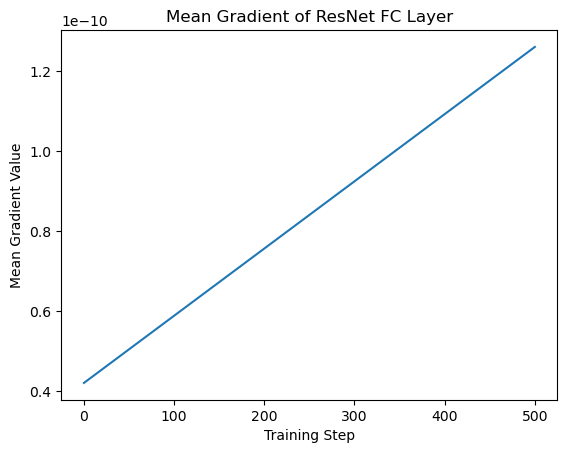

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the gradient tensor for the final fully connected layer
fc_gradients_dict = trial.tensor("gradient/ResNet_fc.weight").values()

# Extract the training steps (keys) and corresponding gradient values (values)
steps = list(fc_gradients_dict.keys())  # These are the training steps
gradients = [fc_gradients_dict[step] for step in steps]  # Corresponding gradient values

# Since gradients can be multi-dimensional, we'll flatten them
flattened_gradients = [np.mean(g) for g in gradients]  # Take the mean of the gradients across dimensions

# Plot the gradient values over steps
plt.plot(steps, flattened_gradients)
plt.title("Mean Gradient of ResNet FC Layer")
plt.xlabel("Training Step")
plt.ylabel("Mean Gradient Value")
plt.show()

*Observations:*

The gradients seem to be very small. This could indicate vanishing gradients, which slow down learning as the gradients become too small for effective weight updates. But the gradient is increasing over time, but it might be increasing too slowly or by very small amounts.

*Things to Consider:*

We can check if the learning rate is too small or too large. Vanishing gradients can occur if the learning rate is too small.

## Visualizing Loss Over Time

<class 'dict'>
{0: array(5.11169, dtype=float32), 100: array(1.0409449, dtype=float32), 200: array(0.55045664, dtype=float32), 300: array(0.13575149, dtype=float32), 400: array(0.2272435, dtype=float32), 500: array(0.13480504, dtype=float32), 520: array(0.99972165, dtype=float32)}


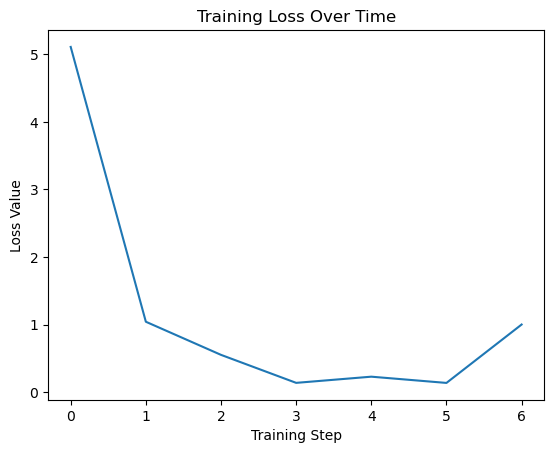

In [46]:
# Extract the loss tensor values over the training steps
loss_values = trial.tensor("CrossEntropyLoss_output_0").values()

# Check the type and structure of the loss values
print(type(loss_values))
print(loss_values)

if isinstance(loss_values, dict):
    loss_values = [v for v in loss_values.values()]

# Plot the loss over steps
plt.plot(loss_values)
plt.title("Training Loss Over Time")
plt.xlabel("Training Step")
plt.ylabel("Loss Value")
plt.show()

*Observations:*

The loss is decreasing with training steps, which is expected behavior. The increase at the end may show that it is maybe overfitting at the end. Or maybe we may still get better results with more epochs.

*Things to Consider:*

We can change the number of epochs to see how it differs. Also we can track and plot this together with validation loss, accuracy and other metrics to get a better insight.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

# Profiler

In [ ]:
# TODO: Display the profiler output

In [47]:
rule_output_path = "s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/rule-output/"

In [48]:
! aws s3 ls {rule_output_path} --recursive

2024-09-10 09:54:39     374806 MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-report.html
2024-09-10 09:54:38     222736 MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2024-09-10 09:54:33        193 MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2024-09-10 09:54:33        201 MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2024-09-10 09:54:33       1801 MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2024-09-10 09:54:33        127 MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2024-09-10 09:54:33        200 MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/IOBottleneck.json
2024-09-10 09:54:33        119 MAIN-2024-09-10-08-03-03-075/

In [49]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/rule-output/ProfilerRepor

In [50]:
training_job_name = 'MAIN-2024-09-10-08-03-03-075'

sagemaker_client = boto3.client('sagemaker')
training_job = sagemaker_client.describe_training_job(TrainingJobName=training_job_name)
rule_job_summary = training_job.get('DebugRuleConfigurations', [])

# Display rule job summary
for rule_job in rule_job_summary:
    print(f"Rule Name: {rule_job['RuleConfigurationName']}")


Rule Name: VanishingGradient
Rule Name: Overfit
Rule Name: Overtraining
Rule Name: PoorWeightInitialization


## Showing the Profiler Report

In [51]:
from IPython.display import IFrame

# Path to the ProfilerReport HTML file
file_path = "ProfilerReport/profiler-output/profiler-report.html"

# Display the HTML file in an iframe
IFrame(src=file_path, width=1000, height=600)

## Model Deploying and Prediction

In [52]:
from sagemaker.predictor import Predictor

jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )

In [53]:
pytorch_model = PyTorchModel(model_data="s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/output/model.tar.gz", 
                             role=sagemaker.get_execution_role(), 
                             entry_point='inference.py',
                             py_version='py3',
                             framework_version='1.8',
                             predictor_cls=ImagePredictor)

In [54]:
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-814424935677/MAIN-2024-09-10-08-03-03-075/output/model.tar.gz), script artifact (None), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-814424935677/pytorch-inference-2024-09-10-10-09-41-091/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-inference-2024-09-10-10-09-46-935
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2024-09-10-10-09-47-758
INFO:sagemaker:Creating endpoint with name pytorch-inference-2024-09-10-10-09-47-758


-------!

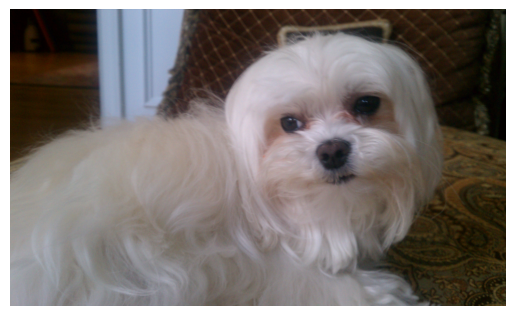

In [30]:
# Define the image path
image_path = 'dogImages/test/101.Maltese/Maltese_06728.jpg'  # Provide the path to your test image

import matplotlib.pyplot as plt
import io
from PIL import Image

# Reading an image from a local file as bytes
with open(image_path, "rb") as img_file:
    local_img_bytes = img_file.read()

# Convert bytes data to an image object
image = Image.open(io.BytesIO(local_img_bytes))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis labels
plt.show()

In [32]:
response=predictor.predict(local_img_bytes, initial_args={"ContentType": "image/jpeg"})
import numpy as np
np.argmax(response)

100

In [33]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2024-09-10-05-52-32-669
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2024-09-10-05-52-32-669
